# TESTING OUT CRYPTO GRAPH 

In [1]:
# importing required libraries for financial plot fetch and graphing
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt


Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
#grabbing crypto of choice: I'm going to go with Bitcoin, Ether, and Dogecoin
cryptocs = ['BTC-USD','ETH-USD', 'DOGE-USD']

In [5]:
#Grabbing data from a year ago
datafetch = yf.download(cryptocs, start = '2021-06-25', end = '2022-06-25')
datafetch.head()

[*********************100%***********************]  3 of 3 completed


Adj Close                                Close            \
                 BTC-USD  DOGE-USD      ETH-USD       BTC-USD  DOGE-USD   
Date                                                                      
2021-06-25  31637.779297  0.239153  1813.217285  31637.779297  0.239153   
2021-06-26  32186.277344  0.244784  1829.239258  32186.277344  0.244784   
2021-06-27  34649.644531  0.264450  1978.894653  34649.644531  0.264450   
2021-06-28  34434.335938  0.256857  2079.657471  34434.335938  0.256857   
2021-06-29  35867.777344  0.262769  2160.768311  35867.777344  0.262769   

                                 High                                  Low  \
                ETH-USD       BTC-USD  DOGE-USD      ETH-USD       BTC-USD   
Date                                                                         
2021-06-25  1813.217285  35487.246094  0.289145  2017.759521  31350.884766   
2021-06-26  1829.239258  32637.587891  0.255127  1850.179810  30184.501953   
2021-06-27  1978.894653  34656.128906  0.266891  1979.958130  32071.757812   
2021-06-28  2079.657471  35219.890625  0.266982  2139.805420  33902.074219   
2021-06-29  2160.768311  36542.109375  0.274940  2242.238770  34252.484375   

                                           Open                         \
            DOGE-USD      ETH-USD       BTC-USD  DOGE-USD      ETH-USD   
Date                                                                     
2021-06-25  0.230006  1794.400391  34659.105469  0.263480  1989.215820   
2021-06-26  0.230972  1719.559448  31594.664062  0.237673  1810.884277   
2021-06-27  0.240894  1811.245850  32287.523438  0.246045  1830.996948   
2021-06-28  0.250762  1963.615479  34679.121094  0.264918  1981.386475   
2021-06-29  0.252988  2076.240234  34475.558594  0.257061  2083.448730   

                 Volume                           
                BTC-USD    DOGE-USD      ETH-USD  
Date                                              
2021-06-25  40230904226  5542163262  22774334998  
2021-06-26  38585385521  2649457302  20637542361  
2021-06-27  35511640894  2167521670  19885474742  
2021-06-28  33892523752  1932994784  25514602841  
2021-06-29  37901460044  2192562738  24815124419

In [11]:
#checking for any null statuses
datafetch.isnull().any()

Adj Close  BTC-USD     False
           DOGE-USD    False
           ETH-USD     False
Close      BTC-USD     False
           DOGE-USD    False
           ETH-USD     False
High       BTC-USD     False
           DOGE-USD    False
           ETH-USD     False
Low        BTC-USD     False
           DOGE-USD    False
           ETH-USD     False
Open       BTC-USD     False
           DOGE-USD    False
           ETH-USD     False
Volume     BTC-USD     False
           DOGE-USD    False
           ETH-USD     False
dtype: bool

In [12]:
#We check for closing
adj_close=datafetch['Adj Close']
adj_close.head()

,BTC-USD,DOGE-USD,ETH-USD
Date,,,
2021-06-25,31637.779297,0.239153,1813.217285
2021-06-26,32186.277344,0.244784,1829.239258
2021-06-27,34649.644531,0.264450,1978.894653
2021-06-28,34434.335938,0.256857,2079.657471
2021-06-29,35867.777344,0.262769,2160.768311


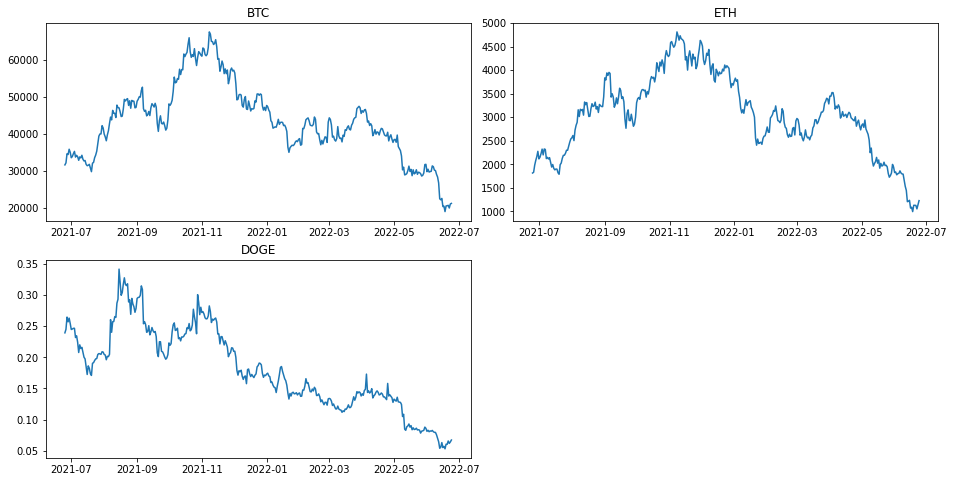

In [33]:
# ploting the adjusted closing price
fig, axs =plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[1,1].remove()
axs[0,0].plot(adj_close['BTC-USD'])
axs[0,0].set_title('BTC')
axs[0,1].plot(adj_close['ETH-USD'])
axs[0,1].set_title('ETH')
axs[1,0].plot(adj_close['DOGE-USD'])
axs[1,0].set_title('DOGE')
plt.show()

In [30]:
# Returns i.e. percentage change in the adjusted close price and drop the first row with NA's
returns = adj_close.pct_change().dropna(axis=0)
#view the first 5 rows of the data frame
returns.head()

,BTC-USD,DOGE-USD,ETH-USD
Date,,,
2021-06-26,0.017337,0.023546,0.008836
2021-06-27,0.076535,0.080340,0.081813
2021-06-28,-0.006214,-0.028712,0.050919
2021-06-29,0.041628,0.023017,0.039002
2021-06-30,-0.023055,-0.032553,0.052657


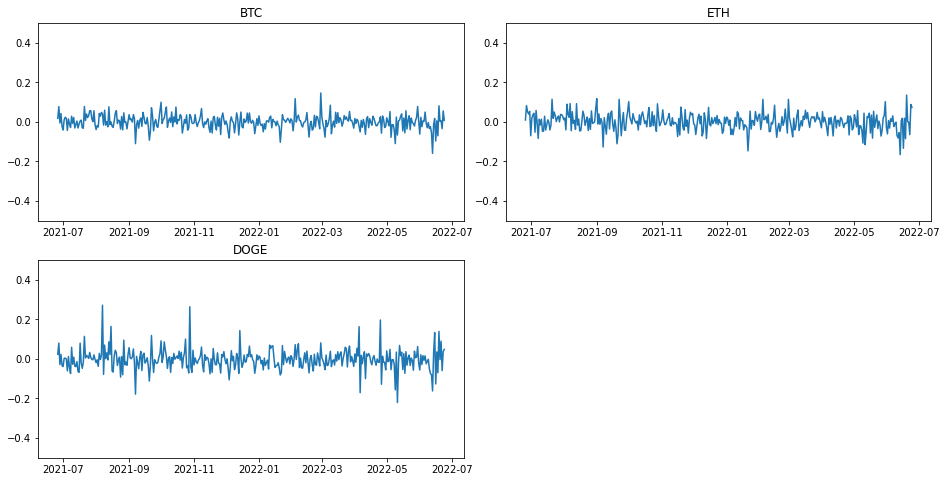

In [34]:
#ploting the returns
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[1,1].remove()

axs[0,0].plot(returns['BTC-USD'])
axs[0,0].set_title('BTC')
axs[0,0].set_ylim([-0.5,0.5])
axs[0,1].plot(returns['ETH-USD'])
axs[0,1].set_title('ETH')
axs[0,1].set_ylim([-0.5,0.5])
axs[1,0].plot(returns['DOGE-USD'])
axs[1,0].set_title('DOGE')
axs[1,0].set_ylim([-0.5,0.5])
plt.show()

In [35]:
#volatility, standard deviation of the returns
returns.std()


BTC-USD     0.035841
DOGE-USD    0.053333
ETH-USD     0.044298
dtype: float64

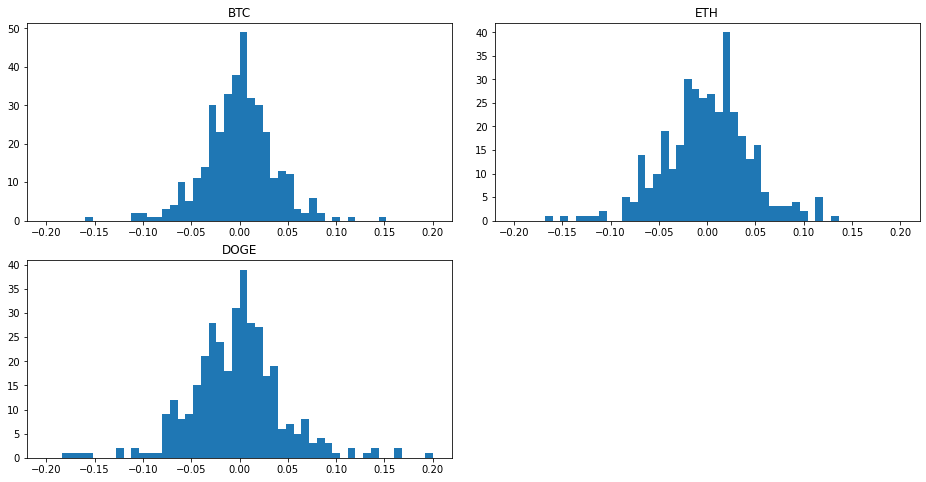

In [38]:
#ploting the histogram
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[1,1].remove()
axs[0,0].hist(returns['BTC-USD'], bins=50, range=(-0.2, 0.2))
axs[0,0].set_title('BTC')
axs[0,1].hist(returns['ETH-USD'], bins=50, range=(-0.2, 0.2))
axs[0,1].set_title('ETH')
axs[1,0].hist(returns['DOGE-USD'], bins=50, range=(-0.2, 0.2))
axs[1,0].set_title('DOGE')
plt.show()

In [39]:
# Cumulative return series
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

,BTC-USD,DOGE-USD,ETH-USD
Date,,,
2021-06-26,1.733681,2.354560,0.883621
2021-06-27,9.519838,10.577754,9.137204
2021-06-28,8.839295,7.402797,14.694333
2021-06-29,13.370085,9.874857,19.167644
2021-06-30,10.756307,6.298062,25.442639


Text(0.5, 1.0, 'Cumulative Returns')

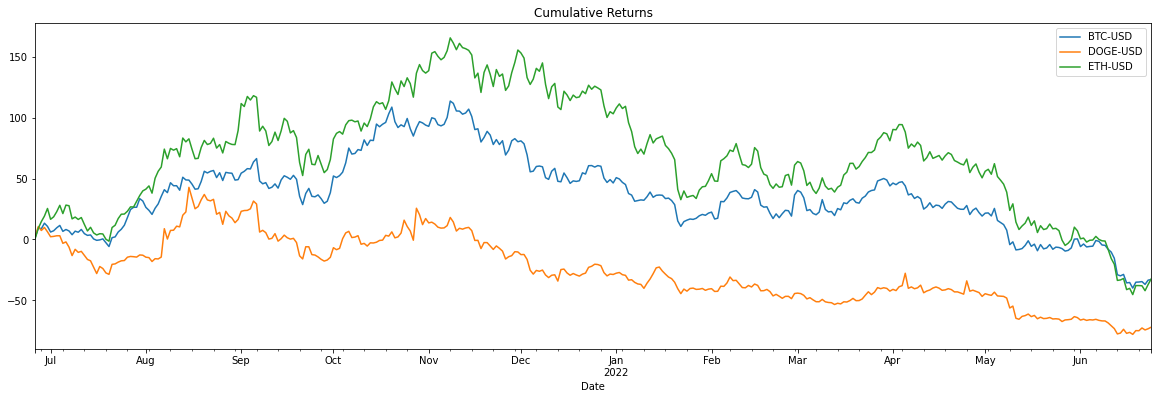

In [45]:
cum_returns.plot(figsize=(20,6))
plt.title('Cumulative Returns')


In [46]:
#compute the correlations
returns.corr()

,BTC-USD,DOGE-USD,ETH-USD
BTC-USD,1.000000,0.697290,0.868059
DOGE-USD,0.697290,1.000000,0.726763
ETH-USD,0.868059,0.726763,1.000000


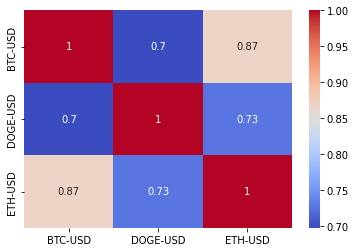

In [47]:
#plot the correlations
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.show()

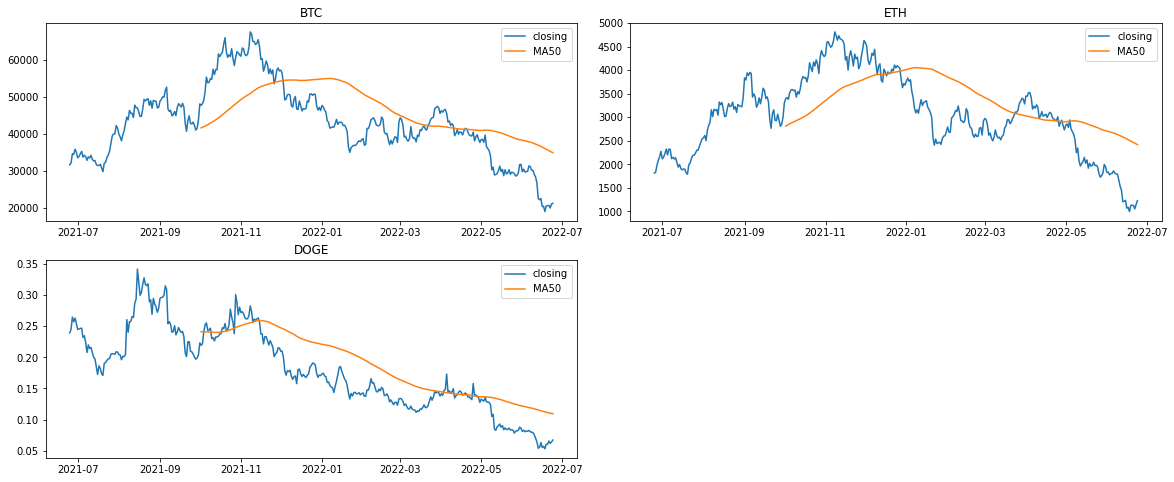

In [51]:
# compute a short-term 20-day moving average
MA20 = adj_close.rolling(20).mean()
# compute a Long-term 50-day moving average
MA50 = adj_close.rolling(100).mean()
# compute a Long-term 100-day moving average
MA100 = adj_close.rolling(100).mean()
# ploting the moving average
fig, axs = plt.subplots(2,2,figsize=(20,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[1,1].remove()
axs[0,0].plot(adj_close['BTC-USD'], label= 'closing')
axs[0,0].plot(MA50['BTC-USD'], label= 'MA50')
axs[0,0].set_title('BTC')
axs[0,0].legend()
axs[0,1].plot(adj_close['ETH-USD'], label= 'closing')
axs[0,1].plot(MA50['ETH-USD'], label= 'MA50')
axs[0,1].set_title('ETH')
axs[0,1].legend()
axs[1,0].plot(adj_close['DOGE-USD'], label= 'closing')
axs[1,0].plot(MA50['DOGE-USD'], label= 'MA50')
axs[1,0].set_title('DOGE')
axs[1,0].legend()
plt.show()

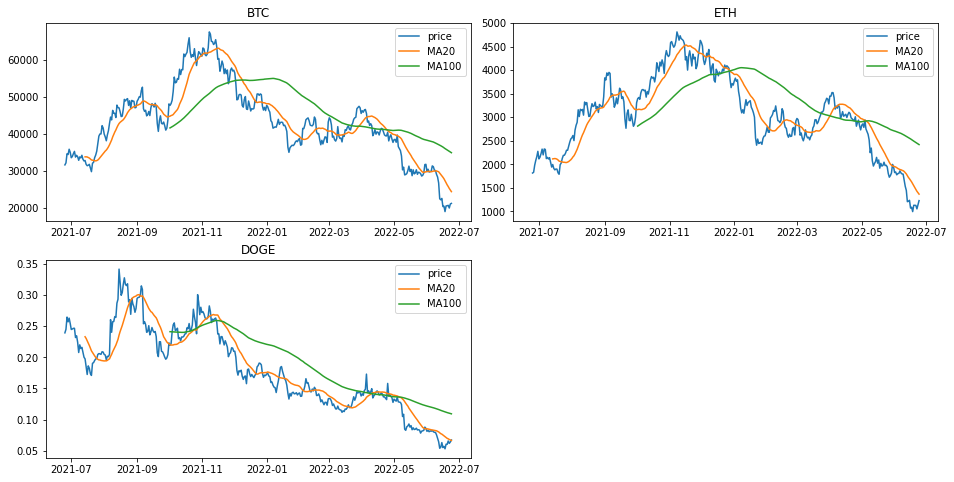

In [52]:
# ploting the moving average
fig, axs = plt.subplots(2,2,figsize=(16,8),gridspec_kw ={'hspace': 0.2, 'wspace': 0.1})
axs[1,1].remove()

axs[0,0].plot(adj_close['BTC-USD'], label= 'price')
axs[0,0].plot(MA20['BTC-USD'], label= 'MA20')
axs[0,0].plot(MA100['BTC-USD'], label= 'MA100')
axs[0,0].set_title('BTC')
axs[0,0].legend()
axs[0,1].plot(adj_close['ETH-USD'], label= 'price')
axs[0,1].plot(MA20['ETH-USD'], label= 'MA20')
axs[0,1].plot(MA100['ETH-USD'], label= 'MA100')
axs[0,1].set_title('ETH')
axs[0,1].legend()
axs[1,0].plot(adj_close['DOGE-USD'], label= 'price')
axs[1,0].plot(MA20['DOGE-USD'], label= 'MA20')
axs[1,0].plot(MA100['DOGE-USD'], label= 'MA100')
axs[1,0].set_title('DOGE')
axs[1,0].legend()
plt.show()